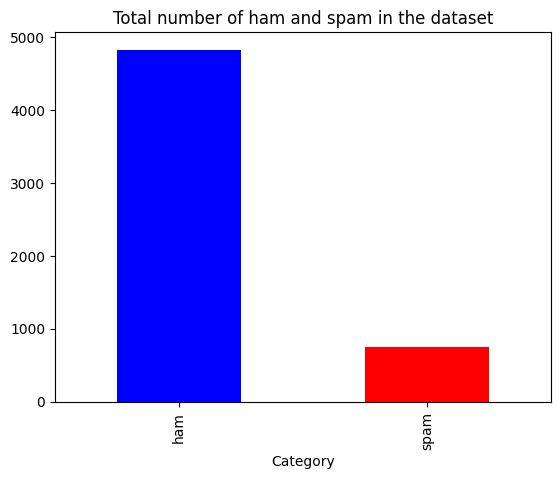

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_link = 'https://media.geeksforgeeks.org/wp-content/uploads/20240620175612/spam_email.csv'
df = pd.read_csv(dataset_link)

df['Category'].value_counts().plot.bar(color=['b','r'])
plt.title('Total number of ham and spam in the dataset')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.92      0.83      0.87       149

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



<Axes: >

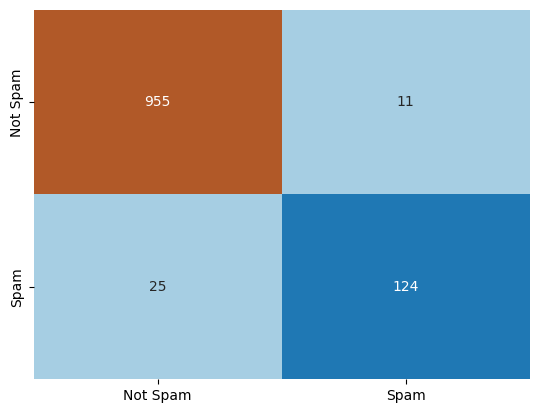

In [3]:
# prepare the data for the decision tree
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Function to extract only the word form the message
def clean_str(string: str) -> str:
    reg = RegexpTokenizer(r'[a-z]+')
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

# change the ham/spam value into numerical equivalents
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

df['text_clean'] = df['Message'].apply(lambda string: clean_str(string))

# used to turn the string into numerical vectorized value in form of a matrix of values
cv = CountVectorizer()
X = cv.fit_transform(df['text_clean'])
y = df['Category']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state = 42)

from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=16, random_state=10)
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
print(classification_report(ytest, pred))

import seaborn as sea 

cm = confusion_matrix(ytest, pred)
sea.heatmap(cm, annot=True, cmap='Paired', cbar=False, fmt='d', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])


